# LAND PRICE PREDICTION APP USING AWS SAGEMAKER - End-to-End
We will build a Land Price Prediction App to help people looking to buy land in Cameroon, get the expected price per quartier they intend to buy land from.
As seen in the Best Practices for Machine Learning Projects on AWS, the following steps will be taken:
- I)   PROBLEM STATEMENT:

Many people in Cameroon want to buy lands and they have trouble getting informatoon of what to expect as price per suare metre for the quartier they want to buy the land in.They also want to be able to consult the prices of several quartiers before making their choice.
This is a difficult process in Cameroon as it will mean these people who want to buy lands will have to go about making phone calls and asking pople what are the prices of lands in different areas.
So the objective is to scrape the data already available on the biggest Classified adds website in Cameroon (Jumia Cameroon) https://www.jumia.cm/en/land-plots

This data will be cleaned and trained using the in-built XGBoost Algorithm on AWS Sagemaker, and an endpoint will be created in AWS ,which wll be used to make predictions when given the inputs like 
- The Quartier the customer wants to buy land from
- The size of the land the customer intends to buy (in metres square)
- And the outputt of the model will be the predicted Price per metre square for the Quartier the customer requested.


- II)   SCRAPING THE DATA:

Scrape the data from a Classified ads website, where people post lands for sale per quartier in Cameroon.They typically type in the price per metres square and the total area of the land availlable for sale
- III)  PERFORM EXPLORATORY DATA ANALYSIS 

Inspect the data to validate the quality of the data scraped from the classified ads website.See the distribution of missing values, outliers and gain other insight which will be used in the Feature Engineering stage to better prepare the features for the machine learning model to be able to make accurate predictions.
- IV) DO FEATURE ENGINEERING & SELECTION

Handle the mising values, outliers and do the necessary transformations which will ensure the data is well suited for the machine learning model.And also to maximise the insights gotten from the Exploratory Data Analysis phase.
- V)  BUILD,TRAIN AND DEPLOY THE MODEL IN SAGEMAKER

The Boto3 Container will be used to create the S3 buckets to store the preprocessed dataset.The Sagemaker's inbuilt XGBoost algorithm, will be built, trained and deployed.Including the use of optimal hyperparameters to get the best results for the RMSE( Root Mean Squared Error).An Endpoint will be created after the model is built.

- VI)   MODEL INFERENCE IN SAGEMAKER

The Endpoint created above will be used to predict the price per metre square when the inputs of "Quartier" and "Land size" are entered.

### IV) FEATURE ENGINEERING
We will perform the following tasks in order to successfully complete the Feature Engineering
- a.) Importing the necessary Libraries and scraped data
- b.) Fixing the "Price" data entry inconsistencies
- c.) Train test split
- d.) Missing Values Treatment
- e.) Outliers Treatment
- f.) Categorical Variable Treatment
- g.) Data Standardisation
- h.) Feature Selection

#### a.) Importing the necessary Libraries

In [283]:
#Importing libraries we will need in this phase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [284]:
#View all columns in the dataset
pd.set_option("display.max_columns",None)

dataset = pd.read_csv("land_price_data.csv",index_col = 0)

print(dataset.head())

   Price Location     Area
0   8000   Douala  10000.0
1  55000    Yassa    300.0
2  55000    Yassa    200.0
3  55000   Japoma    735.0
4  55000   Japoma   1500.0


#### b.) Fixing the data entry inconsistencies

In [285]:
#Viewing the descriptive statistics
print(dataset.Price.describe())

count    4.490000e+03
mean     4.961029e+07
std      8.482607e+08
min      0.000000e+00
25%      1.000000e+04
50%      3.500000e+04
75%      5.000000e+05
max      4.500000e+10
Name: Price, dtype: float64


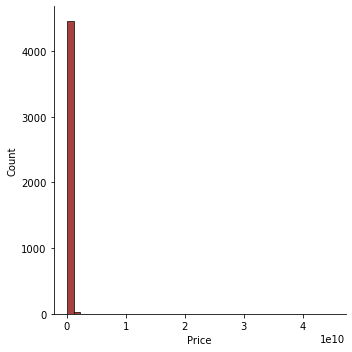

In [286]:
#Plot to see the distribution of Price
sns.displot(dataset['Price'].dropna(),kde=False,color='darkred',bins=40)

In [287]:
dataset['Price2'] = np.where(dataset['Price'] > 500000 ,dataset['Price']/ dataset['Area'] , dataset['Price'])
print(dataset)

      Price  Location     Area   Price2
0      8000    Douala  10000.0   8000.0
1     55000     Yassa    300.0  55000.0
2     55000     Yassa    200.0  55000.0
3     55000    Japoma    735.0  55000.0
4     55000    Japoma   1500.0  55000.0
...     ...       ...      ...      ...
4485   6500     Yassa    150.0   6500.0
4486  17000    Tsinga   1000.0  17000.0
4487  50000  Bonaberi    300.0  50000.0
4488  50000  Bonaberi   1000.0  50000.0
4489  65000  Bonaberi    500.0  65000.0

[4490 rows x 4 columns]


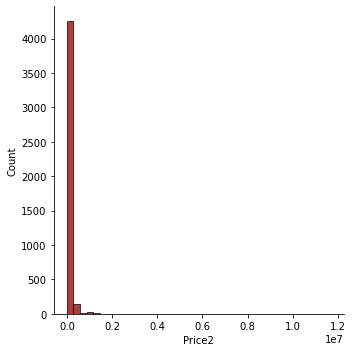

In [288]:
#Plot to see the distribution of Price
sns.displot(dataset['Price2'].dropna(),kde=False,color='darkred',bins=40)

In [289]:
min_threshold,max_threshold = dataset["Price2"].quantile([0.005,0.985])
min_threshold,max_threshold

(137.5, 500000.0)

In [290]:
dataset[dataset.Price2<min_threshold]

,Price,Location,Area,Price2
104,650000,Soa,400000.0,1.625000
212,10000000,PK12,120000.0,83.333333
358,1500000,Foumbot,50000.0,30.000000
970,900000,Limbé,10000.0,90.000000
1305,7000000,Kribi,200000.0,35.000000
1884,3000000,Yabassi,500000.0,6.000000
2061,3500000,PK33,32000.0,109.375000
2076,3000000,Yabassi,50000.0,60.000000
2171,3000000,Yabassi,30000.0,100.000000
2172,3000000,Yabassi,30000.0,100.000000


In [291]:
dataset[dataset.Price2>max_threshold]

,Price,Location,Area,Price2
21,200000000,Bonamoussadi,300.0,6.666667e+05
138,300000000,Akwa,449.0,6.681514e+05
150,200000000,Bonamoussadi,300.0,6.666667e+05
386,600000000,Bali,500.0,1.200000e+06
540,950000000,Bonapriso,886.0,1.072235e+06
589,160000000,Akwa,304.0,5.263158e+05
628,340000000,Bonapriso,363.0,9.366391e+05
1266,700000000,Bonapriso,832.0,8.413462e+05
1401,1500000000,Yaoundé,1500.0,1.000000e+06
1464,918000000,Bonanjo,918.0,1.000000e+06


In [292]:
dataset = dataset[(dataset.Price2>min_threshold) & (dataset.Price2<max_threshold)]
dataset.shape

(4341, 4)

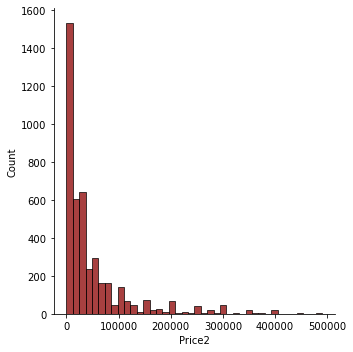

In [293]:
#Plot to see the distribution of Price
sns.displot(dataset['Price2'].dropna(),kde=False,color='darkred',bins=40)

#### c.) Train test split

In [294]:
X = dataset.loc[:,['Location','Area']]
X.head()

,Location,Area
0,Douala,10000.0
1,Yassa,300.0
2,Yassa,200.0
3,Japoma,735.0
4,Japoma,1500.0


In [295]:
y = dataset.loc[:,['Price2']]
y.head()

,Price2
0,8000.0
1,55000.0
2,55000.0
3,55000.0
4,55000.0


In [296]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [297]:
train_set = pd.concat([X_train,y_train],axis = 1)
train_set

,Location,Area,Price2
166,Logbessou,400.0,38000.0
1910,Odza,2000.0,27000.0
998,Douala,10000.0,8000.0
1620,PK19,500.0,25000.0
599,Yaoundé,200000.0,175000.0
...,...,...,...
1054,Limbé,625.0,12000.0
3370,PK26,500.0,4500.0
1687,Japoma,356.0,35000.0
2684,Bamenda,400.0,8750.0


In [298]:
train_set.head()

,Location,Area,Price2
166,Logbessou,400.0,38000.0
1910,Odza,2000.0,27000.0
998,Douala,10000.0,8000.0
1620,PK19,500.0,25000.0
599,Yaoundé,200000.0,175000.0


#### d.) Treating Missing Values

In [299]:
train_set.describe()

,Area,Price2
count,3317.000000,3472.000000
mean,8518.085017,51066.985643
std,35277.571545,72689.432097
min,0.000000,150.000000
25%,500.000000,8000.000000
50%,1000.000000,25000.000000
75%,5000.000000,60000.000000
max,500000.000000,490883.590463


In [300]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')

In [301]:
train_set['Area'] = imp.fit_transform(train_set[['Area']])

In [302]:
train_set.describe()

,Area,Price2
count,3472.000000,3472.000000
mean,8182.456221,51066.985643
std,34515.851876,72689.432097
min,0.000000,150.000000
25%,500.000000,8000.000000
50%,1000.000000,25000.000000
75%,5000.000000,60000.000000
max,500000.000000,490883.590463


#### d.) Outliers Treatment

In [303]:
#Apply logs to the Price column
train_set['Price_log'] = train_set.Price2.transform(np.log)
train_set.head()

,Location,Area,Price2,Price_log
166,Logbessou,400.0,38000.0,10.545341
1910,Odza,2000.0,27000.0,10.203592
998,Douala,10000.0,8000.0,8.987197
1620,PK19,500.0,25000.0,10.126631
599,Yaoundé,200000.0,175000.0,12.072541


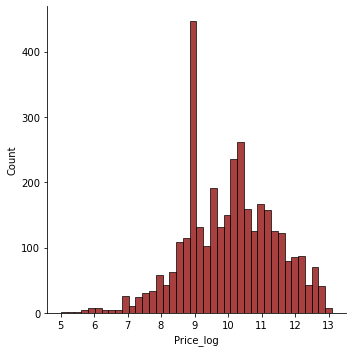

In [304]:
#Plot to see the if Price is a lognormal distribution
sns.displot(train_set['Price_log'].dropna(),kde=False,color='darkred',bins=40)

#### e.) Categorical Variable Treatment

<AxesSubplot:xlabel='Location', ylabel='count'>

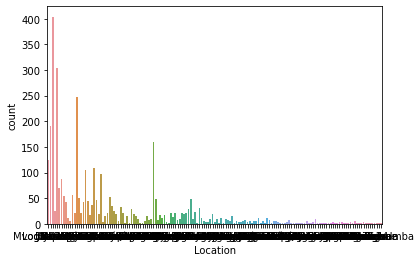

In [305]:
#Looking at the distribution of Location
sns.countplot(x='Location',data = train_set)

In [306]:
#Looking at the number of categories
print(f"The number of categories in the Location variable is : {train_set['Location'].nunique()} locations  \n ")
print(train_set['Location'].unique())

The number of categories in the Location variable is : 153 locations  
 
['Logbessou' 'Odza' 'Douala' 'PK19' 'Yaoundé' 'Makepe' 'Japoma' 'Bonaberi'
 'Village' 'Damase' 'Mvog Atangana Mballa' 'Mfou' 'PK26' 'Yassa' 'Kotto'
 'Nyalla' 'PK16' 'Lendi' 'Soa' 'Efoulan' 'PK12' 'Logpom' 'Bastos' 'PK27'
 'Limbé' 'Newtown Aeroport' 'Deido' 'Centre ville' 'Nkoabang' 'Awae'
 'Omnisports' 'Bassa' 'Eleveur' 'Edéa' 'Mendong' 'Kumba' 'Biyem-Assi'
 'New Bell' 'Ahala' 'PK33' 'Denver' 'Nsam' 'Messa' 'Kondengui' 'PK18'
 'Quartier Golf' 'Bonanjo' 'Buea' 'Kribi' 'PK21' 'Akwa Nord' 'Ndog-Bong'
 'Biteng' 'PK11' 'Etoug Ebe' 'Mvolye' 'Bonapriso' 'Nyom2' 'Nkolfoulou'
 'Mvog Ada' 'Emana' 'Mimboman' 'Nkolbisson' 'Messamendongo' 'PK14'
 'Bonamoussadi' 'Akwa' 'Cite des Palmiers' 'Bonedale' 'Olembe' 'Nyom'
 'Nsimeyong' 'Manjo' 'Obili' 'Logbaba' 'Zone Bassa' 'Bafoussam' 'Mvan'
 'PK25' 'Ndokoti' 'Ntui' 'Tsinga' 'Ngoumou' 'Mbalgong' 'Dibombari'
 'Nkoulouloum' 'Essos' 'Ndogbati' 'Ndogpassi2' 'Mbangue' 'PK20' 'Bali'
 'Mball

There lots of categories.Which would affect the model's performance.Let us identify rare categories (those below 1% of the dataset)

In [307]:
#Checking for rare categories in Locations
category_list = train_set.groupby('Location')['Price2'].count()/len(train_set)
category_list = list(temp[temp>0.01].index)
print(category_list)
print(f"\n There are a total of {len(temp_df)} Popular Locations.")

['Ahala', 'Bastos', 'Bonaberi', 'Bonamoussadi', 'Douala', 'Edéa', 'Japoma', 'Kotto', 'Kribi', 'Lendi', 'Limbé', 'Logbessou', 'Logpom', 'Makepe', 'Mfou', 'Nkoabang', 'Odza', 'PK12', 'PK16', 'PK21', 'Soa', 'Village', 'Yaoundé', 'Yassa']

 There are a total of 24 Popular Locations.


In [308]:
train_set["Location_cat"] = np.where(np.isin(train_set["Location"],category_list),train_set["Location"],"rare")
print(train_set)

       Location      Area    Price2  Price_log Location_cat
166   Logbessou     400.0   38000.0  10.545341    Logbessou
1910       Odza    2000.0   27000.0  10.203592         Odza
998      Douala   10000.0    8000.0   8.987197       Douala
1620       PK19     500.0   25000.0  10.126631         rare
599     Yaoundé  200000.0  175000.0  12.072541      Yaoundé
...         ...       ...       ...        ...          ...
1054      Limbé     625.0   12000.0   9.392662        Limbé
3370       PK26     500.0    4500.0   8.411833         rare
1687     Japoma     356.0   35000.0  10.463103       Japoma
2684    Bamenda     400.0    8750.0   9.076809         rare
2812      Yassa    3000.0   10000.0   9.210340        Yassa

[3472 rows x 5 columns]


In [309]:
Location_dummies = pd.get_dummies(train_set["Location_cat"])
Location_dummies

,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa,rare
166,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1687,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [310]:
train_set = pd.concat([train_set,Location_dummies],axis = 1)
train_set

,Location,Area,Price2,Price_log,Location_cat,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa,rare
166,Logbessou,400.0,38000.0,10.545341,Logbessou,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1910,Odza,2000.0,27000.0,10.203592,Odza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
998,Douala,10000.0,8000.0,8.987197,Douala,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1620,PK19,500.0,25000.0,10.126631,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
599,Yaoundé,200000.0,175000.0,12.072541,Yaoundé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Limbé,625.0,12000.0,9.392662,Limbé,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3370,PK26,500.0,4500.0,8.411833,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1687,Japoma,356.0,35000.0,10.463103,Japoma,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,Bamenda,400.0,8750.0,9.076809,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [311]:
#Dropping the columns titled "Location" and "Rare"
train_set = train_set.drop(['Location','rare'],axis = 1)
train_set

,Area,Price2,Price_log,Location_cat,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa
166,400.0,38000.0,10.545341,Logbessou,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1910,2000.0,27000.0,10.203592,Odza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
998,10000.0,8000.0,8.987197,Douala,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1620,500.0,25000.0,10.126631,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,200000.0,175000.0,12.072541,Yaoundé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,625.0,12000.0,9.392662,Limbé,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3370,500.0,4500.0,8.411833,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1687,356.0,35000.0,10.463103,Japoma,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,400.0,8750.0,9.076809,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### f.) Feature Selection

In [312]:
#Dropping the columns titled "Location_cat"
X_train = train_set.drop(['Location_cat'],axis = 1)
X_train

,Area,Price2,Price_log,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa
166,400.0,38000.0,10.545341,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1910,2000.0,27000.0,10.203592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
998,10000.0,8000.0,8.987197,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1620,500.0,25000.0,10.126631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,200000.0,175000.0,12.072541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,625.0,12000.0,9.392662,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3370,500.0,4500.0,8.411833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1687,356.0,35000.0,10.463103,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2684,400.0,8750.0,9.076809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [313]:
Y = X_train['Price_log']

In [314]:
X = X_train.drop(['Price_log','Price2'],axis =1)

In [315]:
X.head()

,Area,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa
166,400.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1910,2000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
998,10000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1620,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,200000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [316]:
Y

166     10.545341
1910    10.203592
998      8.987197
1620    10.126631
599     12.072541
          ...    
1054     9.392662
3370     8.411833
1687    10.463103
2684     9.076809
2812     9.210340
Name: Price_log, Length: 3472, dtype: float64

### Running the model

In [202]:
# Hyper Parameter Optimization
params ={
    "learning_rate"       : [.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth"           : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight"    : [1, 3, 5, 7 ],
    "gamma"               : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"    : [0.3, 0.4, 0.5, 0.7]
    
}


In [203]:
#Hyperparameter optimzation using Randomized SearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
#from numpy import nan

In [204]:
regressor = xgboost.XGBRegressor()

In [205]:
random_search = RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error', n_jobs=-1,cv=5,verbose=3)

In [206]:
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [207]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [208]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [209]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [210]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,Y,cv=10)

In [211]:
score

array([0.49984833, 0.45308389, 0.4176044 , 0.44018727, 0.39215919,
       0.44644652, 0.43911219, 0.41427898, 0.44025746, 0.50408521])

In [212]:
score.mean()

0.4447063433887207

#### Transforming the Test set to validate model

In [317]:
X_test.describe()

,Area
count,846.000000
mean,12232.199764
std,49272.200611
min,26.000000
25%,500.000000
50%,1000.000000
75%,10000.000000
max,500000.000000


In [319]:
#Treating Missing Values
X_test['Area'] = imp.transform(X_test[['Area']])

In [320]:
X_test.describe()

,Area
count,869.000000
mean,11934.914845
std,48648.478999
min,26.000000
25%,500.000000
50%,1000.000000
75%,9000.000000
max,500000.000000


In [321]:
# Adding Location in Category List
X_test["Location_cat"] = np.where(np.isin(X_test["Location"],category_list),X_test["Location"],"rare")
print(X_test)

       Location    Area Location_cat
3909      Kotto   800.0        Kotto
3804     Olembe   500.0         rare
3937  Tropicana   500.0         rare
573       Limbé   630.0        Limbé
1108     Logpom   400.0       Logpom
...         ...     ...          ...
1524   Bonaberi  2000.0     Bonaberi
3109   Messassi  2200.0         rare
3065       PK21  9000.0         PK21
2722       Odza  1500.0         Odza
938   Logbessou   500.0    Logbessou

[869 rows x 3 columns]


In [322]:
Location_dummies = pd.get_dummies(X_test["Location_cat"])
Location_dummies

,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa,rare
3909,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
573,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1108,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [324]:
X_test = pd.concat([X_test,Location_dummies],axis = 1)
X_test

,Location,Area,Location_cat,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa,rare
3909,Kotto,800.0,Kotto,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3804,Olembe,500.0,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3937,Tropicana,500.0,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
573,Limbé,630.0,Limbé,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1108,Logpom,400.0,Logpom,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,Bonaberi,2000.0,Bonaberi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3109,Messassi,2200.0,rare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3065,PK21,9000.0,PK21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2722,Odza,1500.0,Odza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [329]:
X_test = X_test.drop(['Location','Location_cat','rare'],axis = 1)

In [326]:
regressor.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [342]:
y_pred = regressor.predict(X_test.head())

In [343]:
print(np.exp(y_pred))

[80040.57  26357.576 26357.576 17056.254 82094.8  ]


In [339]:
print(y_test.head())

            Price2
3909  85000.000000
3804  16000.000000
3937  80000.000000
573   20634.920635
1108  87500.000000


In [344]:
X_test.head()

,Area,Ahala,Bastos,Bonaberi,Bonamoussadi,Douala,Edéa,Japoma,Kotto,Kribi,Lendi,Limbé,Logbessou,Logpom,Makepe,Mfou,Nkoabang,Odza,PK12,PK16,PK21,Soa,Village,Yaoundé,Yassa
3909,800.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3804,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3937,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
573,630.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1108,400.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
